In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/KDT/H2/01, Data/03, LPG 충전소 현황/전국_LPG충전소_현황_경도위도_WGS84.csv')


In [ ]:
df

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
2036,제주 제주시,(주)천마와산충전소,제주 제주시 조천읍 와산리 1286,064-784-3205,용기+탱크+13kg용기,제주 제주시 조천읍 와산리 1286,126.678237,33.471562
2037,제주 제주시,정우오라엘피지충전소,제주 제주시 오라2동 1552-1외1필지,064-749-1123,자동차충전,제주 제주시 오라2동 1552-1외1필지,126.515456,33.482576
2038,제주 제주시,굿모닝엘피지충전소,제주 제주시 용담2동 1543,064-745-1151,자동차충전,제주 제주시 용담2동 1543,126.499206,33.504622
2039,제주 제주시,제주오케이충전소,"제주 제주시 이호2동 1580,1581,1582",064-749-5188,자동차충전,"제주 제주시 이호2동 1580,1581,1582",126.457233,33.495064


In [ ]:
df = df[df['행정 구역'].str.contains('서울')]
df

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [ ]:
df.rename(columns={'경도':'X', '위도':'Y'}, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,X,Y
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_lpg = df[['X','Y']]
df_lpg

,X,Y
0,127.105495,37.476386
1,127.035691,37.490497
2,127.078101,37.499342
3,127.075564,37.497799
4,127.113228,37.481193
...,...,...
74,126.921229,37.643674
75,127.098130,37.613902
76,127.079308,37.579608
77,127.075901,37.594187


In [ ]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(df_lpg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 0 0 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 1 2 2 2 1 2 2 1 1 1 3 3 1 1 1 1 2 0 0 0 0 0 2 2 2 2 2
 2 3 3 3 3]


In [ ]:
df_lpg['cluster'] = kmeans.labels_
df_lpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,cluster
0,127.105495,37.476386,1
1,127.035691,37.490497,1
2,127.078101,37.499342,1
3,127.075564,37.497799,1
4,127.113228,37.481193,1
...,...,...,...
74,126.921229,37.643674,2
75,127.098130,37.613902,3
76,127.079308,37.579608,3
77,127.075901,37.594187,3


In [ ]:
centers = kmeans.cluster_centers_
centers

array([[126.82371325,  37.54472033],
       [127.08947395,  37.51896567],
       [126.91528061,  37.5206071 ],
       [127.05926206,  37.62554416]])

In [ ]:
df_center = pd.DataFrame(centers)
df_center

,0,1
0,126.823713,37.544720
1,127.089474,37.518966
2,126.915281,37.520607
3,127.059262,37.625544


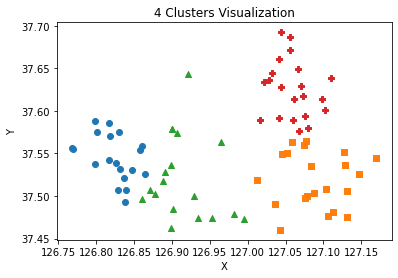

In [ ]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_lpg[df_lpg['cluster']==0].index
marker1_ind = df_lpg[df_lpg['cluster']==1].index
marker2_ind = df_lpg[df_lpg['cluster']==2].index
marker3_ind = df_lpg[df_lpg['cluster']==3].index


# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 X, Y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_lpg.loc[marker0_ind,'X'], y=df_lpg.loc[marker0_ind,'Y'], marker='o') 
plt.scatter(x=df_lpg.loc[marker1_ind,'X'], y=df_lpg.loc[marker1_ind,'Y'], marker='s')
plt.scatter(x=df_lpg.loc[marker2_ind,'X'], y=df_lpg.loc[marker2_ind,'Y'], marker='^')
plt.scatter(x=df_lpg.loc[marker3_ind,'X'], y=df_lpg.loc[marker3_ind,'Y'], marker='P')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Clusters Visualization')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


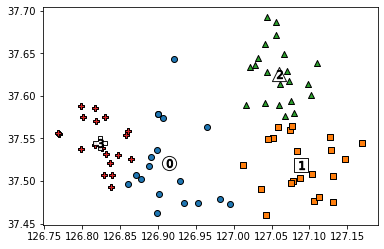

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(df_lpg)
df_lpg['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = df_lpg[df_lpg['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['X'], y=label_cluster['Y'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [ ]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

for i in df_lpg.index:
  folium.Marker([ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], icon=folium.Icon(color='red')).add_to(map)    
  folium.CircleMarker( [ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], radius=10,color='red',fill_color='red').add_to(map)   

map

In [ ]:
df_center

,0,1
0,126.823713,37.544720
1,127.089474,37.518966
2,126.915281,37.520607
3,127.059262,37.625544


In [ ]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

# for i in df_lpg.index:
  # folium.Marker([ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], icon=folium.Icon(color='red')).add_to(map)    
  # folium.CircleMarker( [ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], radius=10,color='red',fill_color='red').add_to(map)

for i in df_center.index:
  folium.Marker([ df_center.loc[i,1], df_center.loc[i,0] ], icon=folium.Icon(color='blue')).add_to(map)       

map